# Data Analysis Tech Degree Unit 6: Graphing Video Game Sales

You’re reviewing sales for the top 100 video games from the years 2000-2015 to gather insights. Use Python’s Pandas, Matplotlib, and Seaborn libraries to interact with the data and create graphs.


## Importing libraries 
``` python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

```

In [72]:

import sys
import itertools
import numpy as np

!{sys.executable} -m pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [73]:
video_games_info=pd.read_csv('top100videogamesales.csv')

## Meets Expectations

###  1. Question 1: 
    A line chart shows the total global sales for each year.
    The result of the chart is explained in markdown.


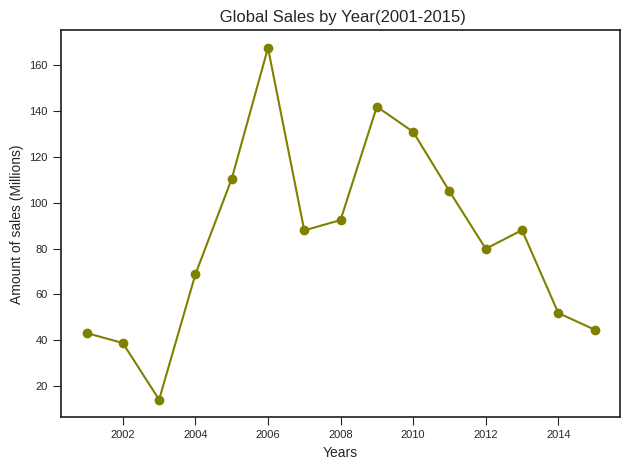

In [74]:
# let's select 2  columns, year and total global sales
yearly_sales=video_games_info[['Year','Global_Sales']]
grouped_sales=yearly_sales.groupby('Year')

sum_of_sales=grouped_sales.sum()


list_of_years=[]
list_of_sales=[]

   
for year, sale in sum_of_sales.iterrows():
   
    list_of_years.append(year)
    list_of_sales.append(sale)



  
plt.title(' Global Sales by Year(2001-2015)')
#print(plt.style.available)
plt.style.use(['seaborn-v0_8-ticks'])

plt.xlabel('Years')
plt.ylabel('Amount of sales (Millions)')



plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


plt.plot(list_of_years, list_of_sales, marker='o',color='olive')
plt.tight_layout()


plt.show()

### Explanation

* The amount of **sales** **increased** the most in the period **from 2003 to 2007** with an extended
slope of increment within that range of years.
* The **highest** amount of **sales** were during the years **2006,2009, 2010**
* **From 2006 to 2007**, there is a significant **drop in the amount of sales**
* **The lowest** amount of **sales** were during the year 2003, 2015,2014

* The lowest amount of sales are presentended in the year 2003

* The amount of sales remained relatively stable from 2007 to 2008
* There is a small increase from 2008 to 2009 with a descending slope from 2009 through 2015 with non-significant increase on 2013



### 2.  Question 2
    A histogram shows the global sales distribution for games with Action as the genre.
    The result of the chart is explained in markdown.


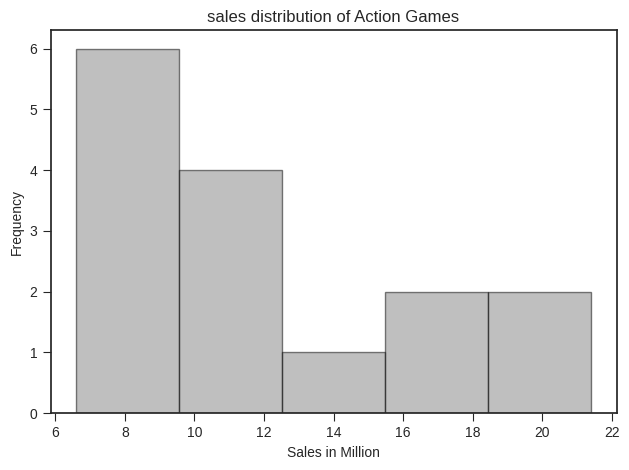

In [75]:

video_games_info.head()
action_games=video_games_info.loc[video_games_info.Genre=='Action']
grouped_by_sales=action_games['Global_Sales']

colors = ['red', 'blue', 'grey']
sorted_sales=grouped_by_sales.sort_values(ascending=True)
weights = np.random.rand(len(sorted_sales))
plt.title('sales distribution of Action Games')
plt.hist(sorted_sales,bins='auto',edgecolor='black',alpha=0.5, color="grey")
plt.xlabel('Sales in Million')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

### Explanation

* The **Distribution of  Sales for  Action Games** are **highly concentrated** in the range of **7-9 millions**, followed by the range from **9 to 13 million**.
* The **Distribution of  Sale for  Action games** is  the **lowest**  in the range of the **13 to 15 million**
* The  **Distribution of  Sale for  Action games** is **moderate¨ in the range of **15 to 21 million**

### 3. Question 3:

* A pie chart shows the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart)
* A pie chart shows the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart)
    Detailed what is included in the other category.
    The differences and similarities between the North American and European charts are explained in markdown


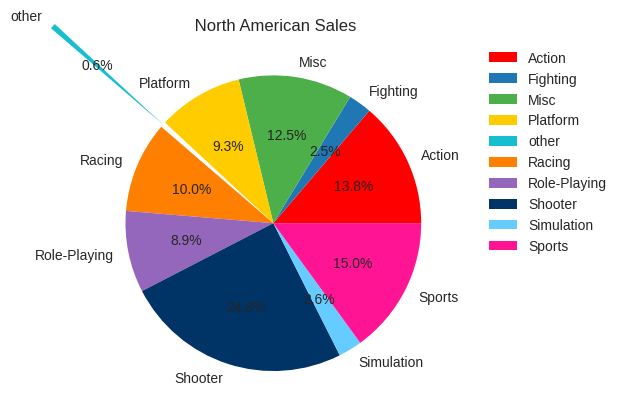

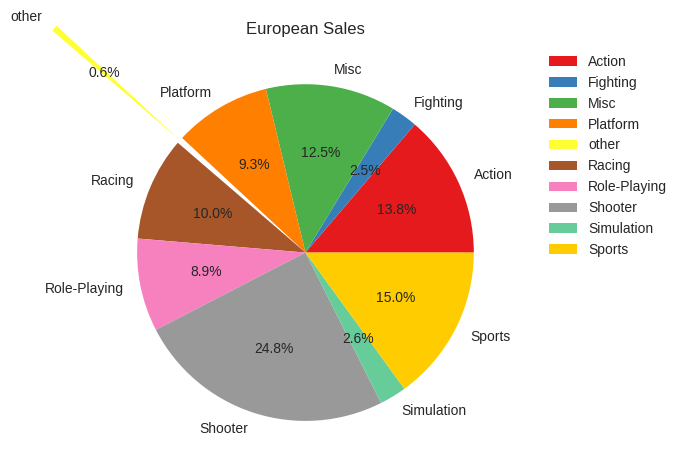

10

In [76]:
#North American Sales info
North_American_Sales=video_games_info[['Genre', 'NA_Sales']]
NA_Sales_group=North_American_Sales.groupby('Genre')
NA_Sales_sum=NA_Sales_group.sum()
#puzzle,fighting Simulation are the least ones
#European sales

Europen_Sales=video_games_info[['Genre','EU_Sales']]

European_Sales_group=Europen_Sales.groupby('Genre')
European_Sales_sum=European_Sales_group.sum()
#European_Sales_group=European_Sales.groupby('Genre')
European_Sales_sum=European_Sales_group.sum()

#
na_labels=[]
na_sales=[]

eu_labels=[]
eu_sales=[]



for genre, na_sale in NA_Sales_sum.iterrows():
    na_labels.append(genre)
    na_sales.append(na_sale.iloc[0])

for eu_genre, eu_sale in NA_Sales_sum.iterrows():
    eu_labels.append(eu_genre)
    eu_sales.append(eu_sale.iloc[0])

na_dict= { k:v for (k,v) in zip(na_labels, na_sales)}
eu_dict={k:v for (k,v) in zip(eu_labels, eu_sales)}



new_na_dict={}
new_eu_dict={}
for key, group in itertools.groupby(na_dict, lambda k : 'other'  if (na_dict[k]<=6) else k):
     new_na_dict[key] = sum([na_dict[k] for k in list(group)])

    
    

for key, group in itertools.groupby(eu_dict, lambda k: 'other' if(eu_dict[k]<=6) else k):
    new_eu_dict[key]=sum([eu_dict[k]for k in list(group)])
  
    


new_na_labels=new_na_dict.keys()
new_na_sales=new_na_dict.values()
new_eu_labels=new_eu_dict.keys()
new_eu_sales= new_eu_dict.values()

na_colors=colors = [
    '#FF0000',  #  - Red
    '#1f77b4',  #  - Blue
    '#4DAF4A',  #  - Green
    '#FFCC00',  #  - Yellow
    '#17becf',  #  - Teal
    '#FF7F00',  #  - Orange
    '#9467bd',  #  - Purple
    '#003366',  #  - Dark Blue
    '#66CCFF',  #  - Light Blue
    '#FF1493'   #  - Pink
]

#explode=(0,0,0,0,1,0,0,0,0,0
plt.title(' North American Sales', fontsize=12)
plt.pie(new_na_sales, labels=new_na_labels,autopct='%1.1f%%',colors=na_colors, explode=(0,0,0,0,1,0,0,0,0,0),normalize=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




plt.title('European Sales', fontsize=12)
eu_colors = colors = [
    '#E41A1C',  # Red
    '#377EB8',  # Blue
    '#4DAF4A',  # Green
    '#FF7F00',  # Orange
    '#FFFF33',  # Yellow
    '#A65628',  # Brown
    '#F781BF',  # Pink
    '#999999',  # Gray
    '#66CC99',  # Light Green
    '#FFCC00'   # Yellow-orange
]
plt.pie(new_eu_sales, labels=new_eu_labels,autopct='%1.1f%%',colors=eu_colors,explode=(0,0,0,0,1,0,0,0,0,0), normalize=True)
#shooter sports and action
#Simulation, Puzzle, Fighting 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




Explanation

* **Import to know**:Any genre that had less than X %, has been added to the “others” category

#### Similarities
All percentages are alike in both markets 

#### Differences
I was not able to find any difference on both with the 6% adjusment for both charts



### Question 4

A bar (or column) chart to show the total number of games created for each platform in the dataset.
    The results are explained in markdown.




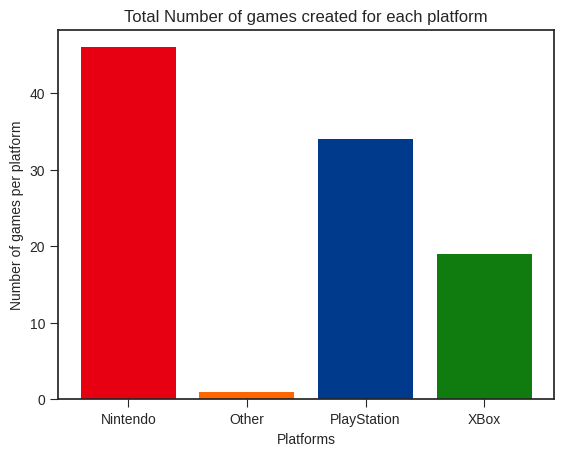

In [78]:
games_and_platforms=video_games_info[['Name','Platform']]
games_and_platforms
#group_by_platform
grouped_games=games_and_platforms.groupby('Platform')

platform_list=[]
game_count_list=[]


games_count= grouped_games.size()
for platform , game_number in games_count.items():
    platform_list.append(platform)
    game_count_list.append(game_number)
    
plt.title('Total Number of games created for each platform')
plt.bar(platform_list, game_count_list,color=['#E60012','#FF6600','#003A8C','#107C10'   ])
plt.xlabel('Platforms')
plt.ylabel('Number of games per platform')


plt.show()



#### Explanation
* Nintendo has the highest number of games
* Playstation has the second highhest number   of games
* X-box has the third highest number of games
* Other unidentified platforms hold the last place in the number of games 

## Exceeds Expectations

    



   1.  The question: “What percentage of global sales does PlayStation have in the dataset?” is answered with an appropriate chart and markdown.

    A stacked column (or bar) chart shows the sales by region for each publisher in the data.

    Chart is explained with markdown and details which publisher had the most sales.

    Charts are not in the default color and settings.


In [ ]:
play_station_sale=video_games_info[['Platform','Global_Sales']]
play_station_sale_group=play_station_sale.groupby('Platform')


play_station_sale_group_sum=play_station_sale_group.sum()
play_station_sale_group_sum

play_labels=[]
play_values=[]

#for label, value in play_station_sale_group_sum.items():
    








    The question: “What is the distribution of sales for Shooter games?” is answered with an appropriate chart and markdown.

    Charts are not in the default color and settings.




    The question: “What genre of game is present the most in the top 100 games from 2000-2015?” is answered with an appropriate chart and markdown.

    Charts are not in the default color and settings.
